In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed/data1h.csv', index_col=0, parse_dates=True)
df

,MpKrakZloRog,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindSpeed,AirPressure,year,day_off,month_sin,month_cos,hour_sin,hour_cos,sin_WindDir,cos_WindDir
2016-01-01 01:00:00,342.9240,-9.153333,0.000000,0.00,1.1,71.593333,0.703333,1000.516667,2016,1,5.000000e-01,0.866025,0.258819,0.965926,-0.996195,-0.087156
2016-01-01 02:00:00,329.6600,-9.475000,0.000000,0.00,1.4,71.685000,0.698333,1000.363333,2016,1,5.000000e-01,0.866025,0.500000,0.866025,-0.999848,-0.017452
2016-01-01 03:00:00,322.5390,-9.851667,0.000000,0.00,1.6,71.863333,0.743333,1000.123333,2016,1,5.000000e-01,0.866025,0.707107,0.707107,-0.974370,0.224951
2016-01-01 04:00:00,294.5480,-10.175000,0.000000,0.00,1.4,71.668333,0.661667,1000.190000,2016,1,5.000000e-01,0.866025,0.866025,0.500000,-0.961262,0.275637
2016-01-01 05:00:00,285.5270,-10.160000,0.000000,0.00,1.5,71.786667,0.600000,999.881667,2016,1,5.000000e-01,0.866025,0.965926,0.258819,-0.939693,-0.342020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,4.635000,0.000000,0.00,1.6,74.210000,0.866667,980.588333,2023,1,-2.449294e-16,1.000000,-0.965926,0.258819,0.974370,0.224951
2023-12-31 20:00:00,32.3285,4.368333,0.000000,0.00,1.4,74.971667,0.721667,980.480000,2023,1,-2.449294e-16,1.000000,-0.866025,0.500000,0.358368,0.933580
2023-12-31 21:00:00,38.2589,3.943333,0.000000,0.00,1.2,76.206667,0.546667,980.611667,2023,1,-2.449294e-16,1.000000,-0.707107,0.707107,-0.358368,0.933580
2023-12-31 22:00:00,41.0132,3.903333,0.000000,0.00,1.5,76.143333,0.585000,980.510000,2023,1,-2.449294e-16,1.000000,-0.500000,0.866025,-0.515038,0.857167


<Axes: >

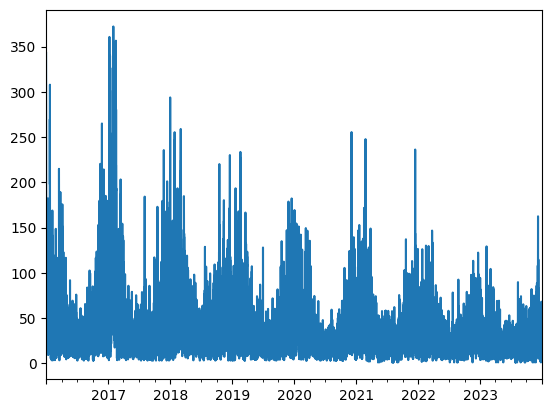

In [3]:
df.MpKrakZloRog.plot()
# outliers

In [4]:
# function to generate numpy with previous data to corresponding label
# last [window_size] to predict next 
def df_to_X_y(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size): # +1?
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size] # true value
        y.append(label)
    return np.array(X), np.array(y)
        

In [5]:
window_size = 24
X, y = df_to_X_y(df.MpKrakZloRog, window_size)

In [6]:
X

array([[[342.924 ],
        [329.66  ],
        [322.539 ],
        ...,
        [ 55.567 ],
        [ 46.3241],
        [ 48.8157]],

       [[329.66  ],
        [322.539 ],
        [294.548 ],
        ...,
        [ 46.3241],
        [ 48.8157],
        [ 58.2517]],

       [[322.539 ],
        [294.548 ],
        [285.527 ],
        ...,
        [ 48.8157],
        [ 58.2517],
        [ 56.8069]],

       ...,

       [[ 22.5349],
        [ 23.4004],
        [ 14.4425],
        ...,
        [ 21.0142],
        [ 29.7133],
        [ 32.3285]],

       [[ 23.4004],
        [ 14.4425],
        [ 22.694 ],
        ...,
        [ 29.7133],
        [ 32.3285],
        [ 38.2589]],

       [[ 14.4425],
        [ 22.694 ],
        [ 20.1745],
        ...,
        [ 32.3285],
        [ 38.2589],
        [ 41.0132]]])

In [7]:
y

array([58.2517, 56.8069, 54.6219, ..., 38.2589, 41.0132, 47.885 ])

In [8]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# prediction based on previous hour
model1 = Sequential()
model1.add(InputLayer(shape=(window_size, 1)))
model1.add(LSTM(64)) # LSTM, number of neurons
model1.add(Dense(8, activation='relu')) # connected with each neuron from previous layer, for more complicated relationships
model1.add(Dense(1, activation='linear')) # for one prediction in the end, linear (no activation function) for continuous variable
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
cp = ModelCheckpoint('models/model1t.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 
# the higher learning_rate, the faster the model tries to increase the loss


In [12]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp])
# calidation data to prevent overfitting

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 1979.5210 - root_mean_squared_error: 44.4274 - val_loss: 476.4441 - val_root_mean_squared_error: 21.8276
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 1163.3309 - root_mean_squared_error: 34.0949 - val_loss: 230.2982 - val_root_mean_squared_error: 15.1756
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 770.9802 - root_mean_squared_error: 27.7591 - val_loss: 110.7579 - val_root_mean_squared_error: 10.5242
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 519.9047 - root_mean_squared_error: 22.7927 - val_loss: 60.9002 - val_root_mean_squared_error: 7.8039
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 387.5603 - root_mean_squared_error: 19.6677 - val_loss: 44.8290 - val_root_mean_squared_error: 6.6954
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 285.1420 - root_mean_squared_error: 16.8799 - val_loss: 40.3417 - val_root_mean_squared_error: 6.3515
Ep

In [13]:
from tensorflow.keras.models import load_model
model1 = load_model('models/model1t.keras')

In [14]:
train_predictions = model1.predict(X_train).flatten() # inner brackets
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actual Value': y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


,Train Predictions,Actual Value
0,50.695744,58.2517
1,62.718990,56.8069
2,60.281590,54.6219
3,56.966160,58.4164
4,61.454906,56.0450
...,...,...
59995,17.598072,14.6558
59996,16.024218,20.1205
59997,20.740812,22.6119
59998,23.770876,22.7687


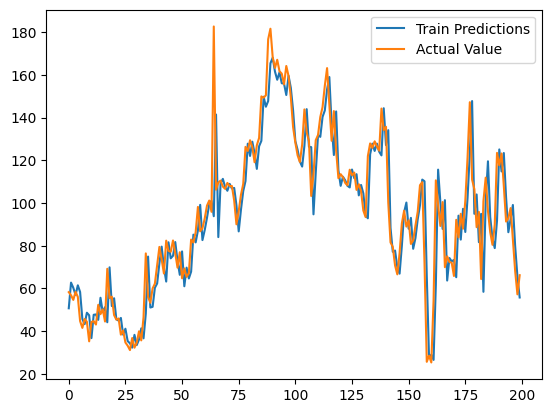

In [15]:
plt.plot(train_results['Train Predictions'][:200], label='Train Predictions')
plt.plot(train_results['Actual Value'][:200], label='Actual Value')
plt.legend()
plt.show()

In [16]:
mse = mean_squared_error(y_train, train_predictions)
print(f'Mean Squared Error: {mse:.4f}')
r2 = r2_score(y_train, train_predictions)
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 116.8002
R-squared: 0.8806


In [17]:
val_predictions = model1.predict(X_val).flatten() # inner brackets
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actual Value': y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Val Predictions,Actual Value
0,19.884977,18.9047
1,19.237013,29.6526
2,27.322718,27.6591
3,26.401306,25.2484
4,23.939013,20.7247
...,...,...
4995,28.177444,28.5876
4996,28.547678,28.0667
4997,28.387865,37.1811
4998,36.698719,27.9977


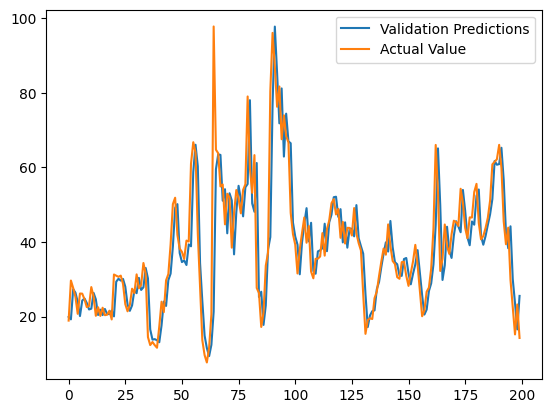

In [18]:
plt.plot(val_results['Val Predictions'][:200], label='Validation Predictions')
plt.plot(val_results['Actual Value'][:200], label='Actual Value')
plt.legend()
plt.show()

In [19]:
mse = mean_squared_error(y_val, val_predictions)
print(f'Mean Squared Error: {mse:.4f}')
r2 = r2_score(y_val, val_predictions)
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 38.9852
R-squared: 0.8999


In [20]:
# each window is "closed"
# no prediction based on predicted values
test_predictions = model1.predict(X_test).flatten() # inner brackets
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actual Value': y_test})
test_results

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Test Predictions,Actual Value
0,22.480089,16.6234
1,17.650839,22.7184
2,21.836277,23.3332
3,23.209940,26.1274
4,25.762177,20.2660
...,...,...
5098,20.825010,29.7133
5099,28.806479,32.3285
5100,31.864214,38.2589
5101,36.915791,41.0132


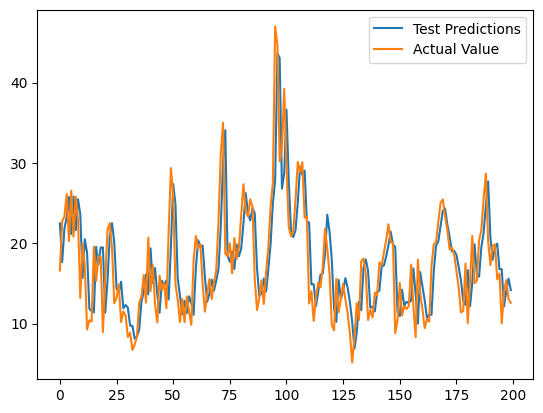

In [21]:
plt.plot(test_results['Test Predictions'][:200], label='Test Predictions')
plt.plot(test_results['Actual Value'][:200], label='Actual Value')
plt.legend()
plt.show()

In [22]:
mse = mean_squared_error(test_predictions, y_test)
print(f'Mean Squared Error: {mse:.4f}')
r2 = r2_score(test_predictions, y_test)
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 34.9747
R-squared: 0.8494


In [24]:
def plot_predictions1(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame({'Predictions': predictions, 'Actual Value': y})
    plt.plot(df['Actual Value'][start:end])
    plt.plot(df['Predictions'][start:end])
    plt.show()
    return df, mean_squared_error(y, predictions), r2_score(y, predictions)

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


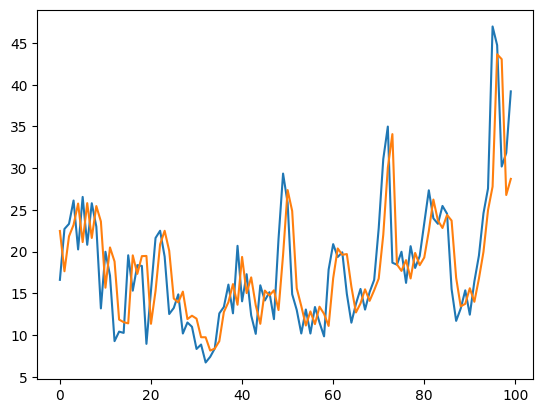

(      Predictions  Actual Value
 0       22.480089       16.6234
 1       17.650839       22.7184
 2       21.836277       23.3332
 3       23.209940       26.1274
 4       25.762177       20.2660
 ...           ...           ...
 5098    20.825010       29.7133
 5099    28.806479       32.3285
 5100    31.864214       38.2589
 5101    36.915791       41.0132
 5102    39.324192       47.8850
 
 [5103 rows x 2 columns],
 np.float64(34.97468161085917),
 0.8636957419967908)

In [25]:
plot_predictions1(model1, X_test, y_test, start=0, end=100)

In [26]:
# faster
model2 = Sequential()
model2.add(InputLayer(shape=(window_size, 1)))
model2.add(Conv1D(64, kernel_size=2)) # instead of LSTM: fewer parameters - faster, easy to train
model2.add(Flatten())
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 23, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1472)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │        11,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,985 (46.82 KB)

 Trainable params: 11,985 (46.82 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
cp2 = ModelCheckpoint('models/model2t.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [28]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[cp2])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 336.4755 - root_mean_squared_error: 17.6518 - val_loss: 39.7140 - val_root_mean_squared_error: 6.3019
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 96.5515 - root_mean_squared_error: 9.8234 - val_loss: 38.0345 - val_root_mean_squared_error: 6.1672
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 91.9687 - root_mean_squared_error: 9.5871 - val_loss: 36.5499 - val_root_mean_squared_error: 6.0457
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 91.3263 - root_mean_squared_error: 9.5523 - val_loss: 36.6076 - val_root_mean_squared_error: 6.0504
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 93.0891 - root_mean_squared_error: 9.6456 - val_loss: 36.1668 - val_root_mean_squared_error: 6.0139
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 90.0285 - root_mean_squared_error: 9.4868 - val_loss: 36.3644 - val_root_mean_squared_error: 6.0303
Epoch 7/15
1875/1875 ━━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


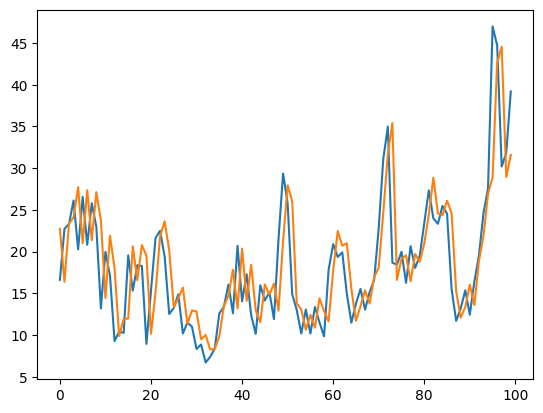

(      Predictions  Actual Value
 0       22.736000       16.6234
 1       16.393847       22.7184
 2       23.372776       23.3332
 3       24.120073       26.1274
 4       27.724165       20.2660
 ...           ...           ...
 5098    22.331831       29.7133
 5099    30.967779       32.3285
 5100    33.458771       38.2589
 5101    38.449570       41.0132
 5102    41.796547       47.8850
 
 [5103 rows x 2 columns],
 np.float64(36.017839357450136),
 0.8596303199234349)

In [29]:
plot_predictions1(model2, X_test, y_test, start=0, end=100)

In [30]:
model3 = Sequential()
model3.add(InputLayer(shape=(window_size, 1)))
model3.add(GRU(64)) # fewer parameters - faster, easy to train
# but closer to typical lstm
model3.add(Flatten())
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
cp3 = ModelCheckpoint('models/model3t.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [32]:
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[cp3])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 1818.4219 - root_mean_squared_error: 42.5624 - val_loss: 135.3738 - val_root_mean_squared_error: 11.6350
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 724.7275 - root_mean_squared_error: 26.8649 - val_loss: 61.2331 - val_root_mean_squared_error: 7.8252
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 354.4754 - root_mean_squared_error: 18.8133 - val_loss: 42.2002 - val_root_mean_squared_error: 6.4962
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 224.0708 - root_mean_squared_error: 14.9605 - val_loss: 37.3803 - val_root_mean_squared_error: 6.1139
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 154.1839 - root_mean_squared_error: 12.4125 - val_loss: 36.0080 - val_root_mean_squared_error: 6.0007
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 141.6651 - root_mean_squared_error: 11.8908 - val_loss: 35.6447 - val_root_mean_squared_error: 5.9703
Epoch 7

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


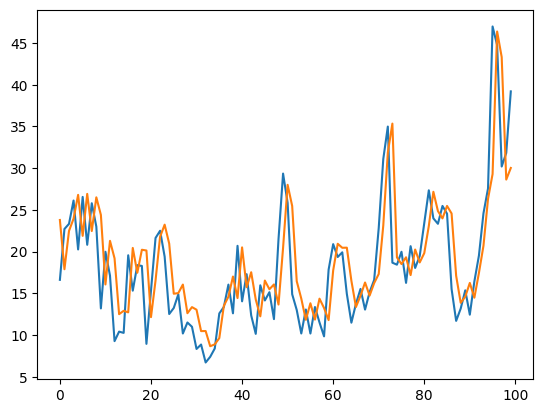

(      Predictions  Actual Value
 0       23.795660       16.6234
 1       17.894550       22.7184
 2       22.488909       23.3332
 3       23.948835       26.1274
 4       26.804840       20.2660
 ...           ...           ...
 5098    21.521070       29.7133
 5099    30.353716       32.3285
 5100    33.150154       38.2589
 5101    38.036156       41.0132
 5102    40.396393       47.8850
 
 [5103 rows x 2 columns],
 np.float64(35.934738309563436),
 0.8599541835341895)

In [33]:
plot_predictions1(model3, X_test, y_test, start=0, end=100)

# Multivariate

In [87]:
# copy won't work
df_pm10 = pd.DataFrame({'pm10': df.MpKrakZloRog}, index=df.index)
df_pm10['seconds'] = df_pm10.index.map(pd.Timestamp.timestamp)
df_pm10

,pm10,seconds
2016-01-01 01:00:00,342.9240,1.451610e+09
2016-01-01 02:00:00,329.6600,1.451614e+09
2016-01-01 03:00:00,322.5390,1.451617e+09
2016-01-01 04:00:00,294.5480,1.451621e+09
2016-01-01 05:00:00,285.5270,1.451624e+09
...,...,...
2023-12-31 19:00:00,29.7133,1.704049e+09
2023-12-31 20:00:00,32.3285,1.704053e+09
2023-12-31 21:00:00,38.2589,1.704056e+09
2023-12-31 22:00:00,41.0132,1.704060e+09


In [88]:
# seconds in day/year for calculations basen on seconds
day = 60 * 60 * 24
year = 365.2425 * day

# the same as added features, just different method
df_pm10['day_sin'] = np.sin(df_pm10['seconds'] * (2*np.pi / day))
df_pm10['day_cos'] = np.cos(df_pm10['seconds'] * (2*np.pi / day))
df_pm10['year_sin'] = np.sin(df_pm10['seconds'] * (2*np.pi / year))
df_pm10['year_cos'] = np.cos(df_pm10['seconds'] * (2*np.pi / year))
df_pm10

,pm10,seconds,day_sin,day_cos,year_sin,year_cos
2016-01-01 01:00:00,342.9240,1.451610e+09,0.258819,0.965926,-0.001950,0.999998
2016-01-01 02:00:00,329.6600,1.451614e+09,0.500000,0.866025,-0.001233,0.999999
2016-01-01 03:00:00,322.5390,1.451617e+09,0.707107,0.707107,-0.000516,1.000000
2016-01-01 04:00:00,294.5480,1.451621e+09,0.866025,0.500000,0.000201,1.000000
2016-01-01 05:00:00,285.5270,1.451624e+09,0.965926,0.258819,0.000917,1.000000
...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,1.704049e+09,-0.965926,0.258819,-0.005218,0.999986
2023-12-31 20:00:00,32.3285,1.704053e+09,-0.866025,0.500000,-0.004501,0.999990
2023-12-31 21:00:00,38.2589,1.704056e+09,-0.707107,0.707107,-0.003785,0.999993
2023-12-31 22:00:00,41.0132,1.704060e+09,-0.500000,0.866025,-0.003068,0.999995


In [89]:
df_pm10 = df_pm10.drop('seconds', axis=1)

In [90]:
# [[[pm1, f1], [pm2, f2],,,,]] [pm25]
def df_to_X_y2(df, window_size=24):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)        

In [91]:
X2, y2 = df_to_X_y2(df_pm10)

In [92]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]

In [93]:
# standarization
# only training (no data leakage)
df_pm10_mean = np.mean(X2_train[:,:,0])
df_pm10_std = np.std(X2_train[:,:,0])

def preprocess(x):
    x[:,:,0] = (x[:,:,0] - df_pm10_mean) / df_pm10_std
    return x

In [94]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[-1.83208153e-01,  7.07106781e-01, -7.07106781e-01,
          5.09828018e-01, -8.60276346e-01],
        [-4.96708474e-01,  5.00000000e-01, -8.66025404e-01,
          5.09211256e-01, -8.60641561e-01],
        [-6.58400546e-01,  2.58819045e-01, -9.65925826e-01,
          5.08594233e-01, -8.61006334e-01],
        ...,
        [ 3.96245220e-02,  1.00000000e+00,  7.62290229e-13,
          4.96821501e-01, -8.67852750e-01],
        [-2.53361602e-01,  9.65925826e-01, -2.58819045e-01,
          4.96199312e-01, -8.68208640e-01],
        [-4.16578680e-01,  8.66025404e-01, -5.00000000e-01,
          4.95576868e-01, -8.68564084e-01]],

       [[-4.96708474e-01,  5.00000000e-01, -8.66025404e-01,
          5.09211256e-01, -8.60641561e-01],
        [-6.58400546e-01,  2.58819045e-01, -9.65925826e-01,
          5.08594233e-01, -8.61006334e-01],
        [-5.38853504e-01,  7.62417300e-12, -1.00000000e+00,
          5.07976948e-01, -8.61370664e-01],
        ...,
        [-2.53361602e-01,  9.6592582

In [95]:
model4 = Sequential()
model4.add(InputLayer(shape=(window_size, 5))) # number of features
model4.add(LSTM(64))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='linear'))
model4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
cp4 = ModelCheckpoint('models/model4t.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [98]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=15, callbacks=[cp4])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 104.7320 - root_mean_squared_error: 10.2285 - val_loss: 37.7159 - val_root_mean_squared_error: 6.1413
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 99.8201 - root_mean_squared_error: 9.9899 - val_loss: 37.5139 - val_root_mean_squared_error: 6.1249
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 95.6608 - root_mean_squared_error: 9.7734 - val_loss: 38.1721 - val_root_mean_squared_error: 6.1784
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 89.3495 - root_mean_squared_error: 9.4514 - val_loss: 37.4831 - val_root_mean_squared_error: 6.1223
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 92.8823 - root_mean_squared_error: 9.6354 - val_loss: 37.6353 - val_root_mean_squared_error: 6.1348
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 89.1538 - root_mean_squared_error: 9.4382 - val_loss: 38.0214 - val_root_mean_squared_error: 6.1661
Epoch 7/15
1875/1875

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


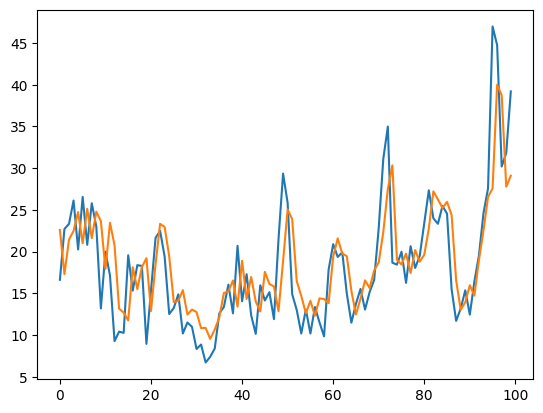

(      Predictions  Actual Value
 0       22.591799       16.6234
 1       17.308342       22.7184
 2       21.441385       23.3332
 3       22.489563       26.1274
 4       24.750042       20.2660
 ...           ...           ...
 5098    23.691643       29.7133
 5099    32.326057       32.3285
 5100    34.967911       38.2589
 5101    39.955471       41.0132
 5102    41.599159       47.8850
 
 [5103 rows x 2 columns],
 np.float64(32.411079510014176),
 0.8736866801862796)

In [99]:
plot_predictions1(model4, X2_test, y2_test)

In [100]:
df_weather = pd.concat([df_pm10, df[['AirTemp', 'WindSpeed']]], axis=1)
df_weather

,pm10,day_sin,day_cos,year_sin,year_cos,AirTemp,WindSpeed
2016-01-01 01:00:00,342.9240,0.258819,0.965926,-0.001950,0.999998,-9.153333,0.703333
2016-01-01 02:00:00,329.6600,0.500000,0.866025,-0.001233,0.999999,-9.475000,0.698333
2016-01-01 03:00:00,322.5390,0.707107,0.707107,-0.000516,1.000000,-9.851667,0.743333
2016-01-01 04:00:00,294.5480,0.866025,0.500000,0.000201,1.000000,-10.175000,0.661667
2016-01-01 05:00:00,285.5270,0.965926,0.258819,0.000917,1.000000,-10.160000,0.600000
...,...,...,...,...,...,...,...
2023-12-31 19:00:00,29.7133,-0.965926,0.258819,-0.005218,0.999986,4.635000,0.866667
2023-12-31 20:00:00,32.3285,-0.866025,0.500000,-0.004501,0.999990,4.368333,0.721667
2023-12-31 21:00:00,38.2589,-0.707107,0.707107,-0.003785,0.999993,3.943333,0.546667
2023-12-31 22:00:00,41.0132,-0.500000,0.866025,-0.003068,0.999995,3.903333,0.585000


In [101]:
X3, y3 = df_to_X_y2(df_weather)

In [102]:
# [[[pm1, f1], [pm2, f2],,,,]] [pm25]
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]  

In [103]:
# standarization
# only training (no data leakage)
pm10_mean = np.mean(X3_train[:,:,0])
pm10_std = np.std(X3_train[:,:,0])

temp_mean = np.mean(X3_train[:,:,5])
temp_std = np.std(X3_train[:,:,5])

wind_mean = np.mean(X3_train[:,:,6])
wind_std = np.std(X3_train[:,:,6])

def preprocess3(x):
    x[:,:,0] = (x[:,:,0] - pm10_mean) / pm10_std
    x[:,:,5] = (x[:,:,5] - temp_mean) / temp_std
    x[:,:,6] = (x[:,:,6] - wind_mean) / wind_std
    return x

In [104]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.83208153e-01,  7.07106781e-01, -7.07106781e-01, ...,
         -8.60276346e-01,  1.36328968e+00, -1.09278190e-01],
        [-4.96708474e-01,  5.00000000e-01, -8.66025404e-01, ...,
         -8.60641561e-01,  1.42771832e+00,  3.97057769e-01],
        [-6.58400546e-01,  2.58819045e-01, -9.65925826e-01, ...,
         -8.61006334e-01,  1.55562532e+00,  2.75716903e-01],
        ...,
        [ 3.96245220e-02,  1.00000000e+00,  7.62290229e-13, ...,
         -8.67852750e-01,  7.58534715e-01,  5.43865236e-01],
        [-2.53361602e-01,  9.65925826e-01, -2.58819045e-01, ...,
         -8.68208640e-01,  8.46530173e-01,  9.25864258e-01],
        [-4.16578680e-01,  8.66025404e-01, -5.00000000e-01, ...,
         -8.68564084e-01,  9.38136676e-01,  1.01424835e+00]],

       [[-4.96708474e-01,  5.00000000e-01, -8.66025404e-01, ...,
         -8.60641561e-01,  1.42771832e+00,  3.97057769e-01],
        [-6.58400546e-01,  2.58819045e-01, -9.65925826e-01, ...,
         -8.61006334e-01,  1.55562532e

In [108]:
model5 = Sequential()
model5.add(InputLayer(shape=(window_size, 7)))
model5.add(LSTM(64))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='linear'))
model5.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,961 (74.07 KB)

 Trainable params: 18,961 (74.07 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
cp5 = ModelCheckpoint('models/model5t.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [111]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=15, callbacks=[cp5])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 98.8250 - root_mean_squared_error: 9.8999 - val_loss: 35.0585 - val_root_mean_squared_error: 5.9210
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 93.1877 - root_mean_squared_error: 9.6298 - val_loss: 34.0402 - val_root_mean_squared_error: 5.8344
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 85.7087 - root_mean_squared_error: 9.2555 - val_loss: 34.1430 - val_root_mean_squared_error: 5.8432
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 83.3489 - root_mean_squared_error: 9.1266 - val_loss: 34.7852 - val_root_mean_squared_error: 5.8979
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 86.2062 - root_mean_squared_error: 9.2539 - val_loss: 33.2646 - val_root_mean_squared_error: 5.7675
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 78.6525 - root_mean_squared_error: 8.8658 - val_loss: 36.4993 - val_root_mean_squared_error: 6.0415
Epoch 7/15
1875/1875 ━

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


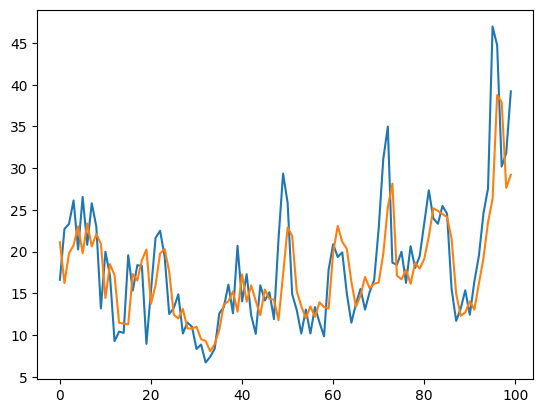

(      Predictions  Actual Value
 0       21.131567       16.6234
 1       16.237696       22.7184
 2       19.795797       23.3332
 3       20.772112       26.1274
 4       23.037996       20.2660
 ...           ...           ...
 5098    25.013933       29.7133
 5099    33.162640       32.3285
 5100    36.166195       38.2589
 5101    42.112221       41.0132
 5102    44.045883       47.8850
 
 [5103 rows x 2 columns],
 np.float64(29.17874016821223),
 0.8862838389110098)

In [112]:
plot_predictions1(model5, X3_test, y3_test)

In [118]:
# increasing complexity of a model
model6 = Sequential()
model6.add(InputLayer(shape=(window_size, 7)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='linear'))
model6.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 24, 32)         │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,481 (119.07 KB)

 Trainable params: 30,481 (119.07 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
cp6 = ModelCheckpoint('models/model6t.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()]) 

In [120]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=15, callbacks=[cp5])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - loss: 1783.3722 - root_mean_squared_error: 42.0887 - val_loss: 315.1453 - val_root_mean_squared_error: 17.7523
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 779.5884 - root_mean_squared_error: 27.8705 - val_loss: 129.6876 - val_root_mean_squared_error: 11.3880
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 433.6224 - root_mean_squared_error: 20.8050 - val_loss: 65.5060 - val_root_mean_squared_error: 8.0936
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 268.8220 - root_mean_squared_error: 16.3847 - val_loss: 47.0066 - val_root_mean_squared_error: 6.8561
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - loss: 187.6454 - root_mean_squared_error: 13.6918 - val_loss: 42.5620 - val_root_mean_squared_error: 6.5240
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - loss: 153.7404 - root_mean_squared_error: 12.3826 - val_loss: 44.2061 - val_root_mean_squared_error: 6.6488

160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


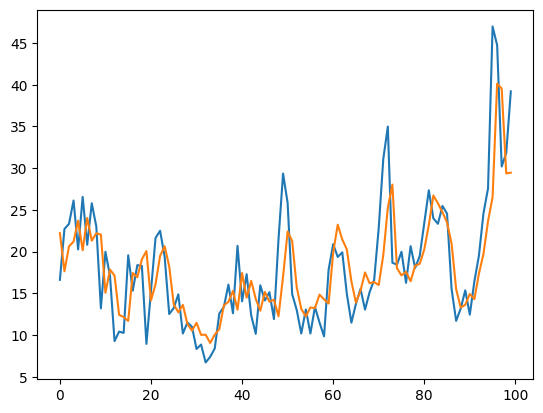

(      Predictions  Actual Value
 0       22.211401       16.6234
 1       17.648779       22.7184
 2       20.639473       23.3332
 3       21.201733       26.1274
 4       23.718874       20.2660
 ...           ...           ...
 5098    24.250420       29.7133
 5099    32.612770       32.3285
 5100    35.266579       38.2589
 5101    40.174118       41.0132
 5102    41.237854       47.8850
 
 [5103 rows x 2 columns],
 np.float64(29.88072763630332),
 0.8835480347075486)

In [121]:
plot_predictions1(model6, X3_test, y3_test)
# no improvement

# Tests

In [136]:
model7 = Sequential()
model7.add(InputLayer(shape=(window_size, 7)))
model7.add(LSTM(64, return_sequences=True))
#model7.add(Dropout(0.2))
model7.add(Dense(8, 'relu'))
model7.add(Dense(1, activation='linear'))
model7.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 64)             │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,961 (74.07 KB)

 Trainable params: 18,961 (74.07 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
cp7 = ModelCheckpoint('models/model7t.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()]) 

In [138]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=15, callbacks=[cp5])

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - loss: 754.1823 - root_mean_squared_error: 26.5938 - val_loss: 41.0656 - val_root_mean_squared_error: 6.4082
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 93.9732 - root_mean_squared_error: 9.6929 - val_loss: 34.1203 - val_root_mean_squared_error: 5.8413
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 81.9134 - root_mean_squared_error: 9.0498 - val_loss: 34.6677 - val_root_mean_squared_error: 5.8879
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 77.2777 - root_mean_squared_error: 8.7901 - val_loss: 36.7935 - val_root_mean_squared_error: 6.0658
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 74.9006 - root_mean_squared_error: 8.6537 - val_loss: 36.3859 - val_root_mean_squared_error: 6.0321
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 76.1578 - root_mean_squared_error: 8.7237 - val_loss: 33.6522 - val_root_mean_squared_error: 5.8010
Epoch 7/15
187

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


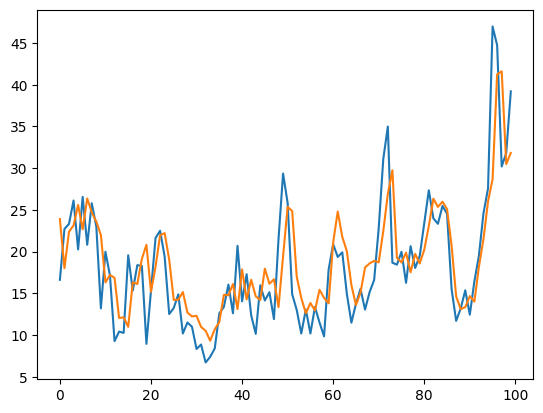

(      Predictions  Actual Value
 0       23.911501       16.6234
 1       18.020460       22.7184
 2       22.387402       23.3332
 3       23.142637       26.1274
 4       25.598206       20.2660
 ...           ...           ...
 5098    27.371630       29.7133
 5099    36.274841       32.3285
 5100    39.420784       38.2589
 5101    45.089279       41.0132
 5102    46.998116       47.8850
 
 [5103 rows x 2 columns],
 np.float64(32.319222203327655),
 0.8740446689213706)

In [139]:
plot_predictions1(model7, X3_test, y3_test)